# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

The  objective of this experiment is to understand Eigen Faces

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P18_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "912345678" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W4_SUN_DL_1" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx pip install scipy==1.00")
    #ipython.magic("sx wget https://cdn.talentsprint.com/Experiment_related_data/week3/Exp5/yalefaces.zip")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week3/Exp5/yalefaces.zip")
    ipython.magic("sx unzip yalefaces.zip")
    ipython.magic("sx mkdir output_new")
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing Required Packages

In [0]:
from scipy.misc import *
from scipy import linalg
import glob
import numpy
import os
import pdb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### Function to load the images from the directory

In [0]:
def load_images(directory):
# get a list of all the picture filenames
    jpgs = glob.glob(directory + '/*')
    # load a greyscale version of each image
    imgs = numpy.array([imresize(imread(i, True), (224, 224)).flatten() for i in jpgs])
    print(imgs.shape)
    return imgs

#### Function to Calculate the eigen faces, weights for each image and mean

In [0]:
def pca(data):
    mu = numpy.mean(data, 0)
    # mean adjust the data
    ma_data = data - mu
    # run SVD
    e_faces, sigma, v = linalg.svd(ma_data.transpose(), full_matrices=False)
    #pdb.set_trace()
    # compute weights for each image
    weights = numpy.dot(ma_data, e_faces)
    return e_faces, weights, mu

#### Function to reconstruct the image . In this function we will be performing the dot product between weights and eigen face then adding the mean value.

In [0]:
def reconstruct(img_idx, e_faces, weights, mu, npcs):
    # dot weights with the eigenfaces and add to mean
    recon = mu + numpy.dot(weights[img_idx, 0:npcs], e_faces[:, 0:npcs].T)
    return recon

#### Function to save the image into a directory named "image"

In [0]:
def save_image(out_dir, subdir, img_id, img_dims, data):
    directory = out_dir + "/" + subdir
    if not os.path.exists(directory): os.makedirs(directory)
    imsave(directory + "/image_" + str(img_id) + ".jpg", data.reshape(img_dims))

#### Loading the new set of images

In [0]:
dir = "yalefaces"

In [0]:
data = load_images(dir)

(165, 50176)


##### Calling the PCA function and storing the eigen faces, weights and mean values

In [0]:
img_dims = (224,224)

In [0]:
e_faces, weights, mu = pca(data)

In [0]:
e_faces.shape

(50176, 165)

##### Saving the mean image in output directory and displaying it

In [0]:
imsave("output_new" + "/mean.jpg", mu.reshape(img_dims))

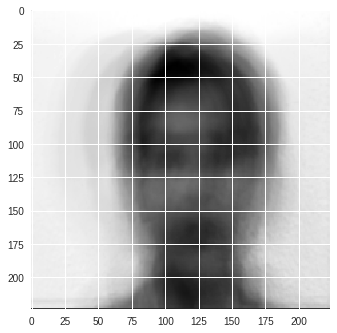

In [0]:
plt.imshow(mu.reshape(224, 224), cmap='gray')

##### Storing the eigen faces as images in directory named "output_new" and display them here

In [0]:
for i in range(e_faces.shape[1]):
    save_image("output_new", "eigenfaces", i, img_dims, e_faces[:,i])

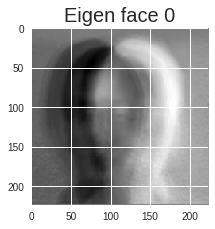

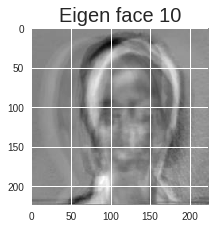

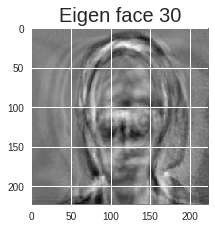

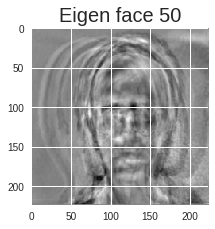

In [0]:
index = [0, 10, 30, 50]

for j, i in enumerate(index) :
    eigenface = "output_new/eigenfaces/image_"+str(i)+".jpg"
    title = "Eigen face " + str(i)
    plt.figure(figsize=(15,15))
    plt.subplot(len(index), j+1,1 )
    plt.imshow(imread(eigenface, True), cmap='gray')
    plt.title(title, size=20)
    plt.show()

##### Checking the shape of a eigen face

In [0]:
e_faces[:, :].shape

(50176, 165)

##### Storing the reconstructed images as well as the residuals in a directory named output_new

In [0]:
reconstructed = []

### Select the number of principal components for reconstruction

In [0]:
no_of_principal_components = 80

In [0]:
img_id = 9

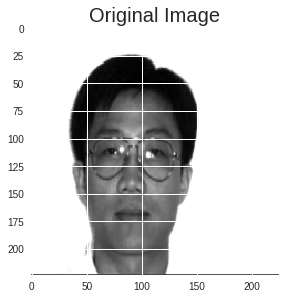

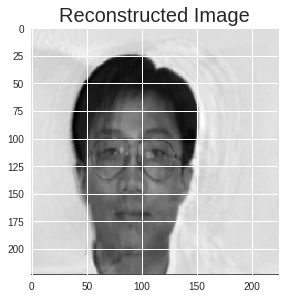

In [0]:
img = reconstruct(img_id, e_faces, weights, mu, no_of_principal_components)
reconstructed.append(img)
title = "Original Image" 
plt.figure(figsize=(10,10))
plt.subplot(2, 1,1)
plt.imshow(data[img_id].reshape(224,224), cmap='gray')
plt.title(title, size=20)
plt.show()
title = "Reconstructed Image" 
plt.figure(figsize=(10,10))
plt.subplot(2, 1,1)
plt.imshow(img.reshape(224,224), cmap='gray')
plt.title(title, size=20)
plt.show()